In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [1]:
import json

In [2]:
with open('/Users/deepakduggirala/Documents/Elephants-dataset/1000/IMG_1617.json') as f:
    data = f.read()

In [8]:
json_data = json.loads(data)

In [74]:
json_data

{'version': '3.21.1',
 'flags': {},
 'shapes': [{'label': 'face_box',
   'line_color': None,
   'fill_color': None,
   'points': [[538.608695652174, 921.2173913043478],
    [1664.695652173913, 3203.8260869565215]],
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'face_mask',
   'line_color': None,
   'fill_color': None,
   'points': [[782.086956521739, 947.3043478260869],
    [599.478260869565, 1077.7391304347825],
    [573.391304347826, 1182.086956521739],
    [573.391304347826, 1234.2608695652173],
    [551.6521739130435, 1290.782608695652],
    [569.0434782608695, 1438.6086956521738],
    [551.6521739130435, 1547.304347826087],
    [625.565217391304, 1686.4347826086955],
    [664.695652173913, 2042.9565217391305],
    [682.086956521739, 2469.0434782608695],
    [760.3478260869565, 2860.3478260869565],
    [869.0434782608695, 3147.304347826087],
    [1029.9130434782605, 3195.1304347826085],
    [1134.260869565217, 3116.869565217391],
    [1095.1304347826085, 3008.173913043

In [75]:
H, W = json_data['imageHeight'], json_data['imageWidth']
H, W

(4032, 3024)

In [12]:
shapes = json_data.get('shapes', [])

In [65]:
shape = shapes[0]

In [15]:
shape.get('shape_type', '')

'rectangle'

In [18]:
shape['points']

[[538.608695652174, 921.2173913043478],
 [1664.695652173913, 3203.8260869565215]]

In [29]:
imgfile = '/Users/deepakduggirala/Documents/Elephants-dataset/1000/IMG_1617.JPG'
img = plt.imread(imgfile, format='jpeg')

In [25]:
img.shape

(3024, 4032, 3)

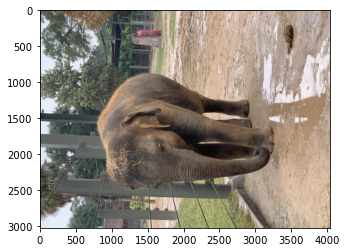

In [26]:
plt.imshow(img)

In [38]:
img = Image.open(imgfile, formats=('JPEG',))

In [40]:
# https://stackoverflow.com/a/63798032/2580077
# https://stackoverflow.com/questions/39132878/python-image-library-image-is-turned-by-90-degree

fixed_img = ImageOps.exif_transpose(img)

In [47]:
fixed_img.height, fixed_img.width

(4032, 3024)

In [63]:
fixed_img.save('/Users/deepakduggirala/Documents/Elephants-dataset/1000/IMG_1617.png', 'PNG')

In [ ]:
Image.open('/Users/deepakduggirala/Documents/Elephants-dataset/1000/IMG_1617.png')

In [48]:
img = np.array(fixed_img)

In [72]:
xmin, ymin = shape['points'][0]
xmax, ymax = shape['points'][1]

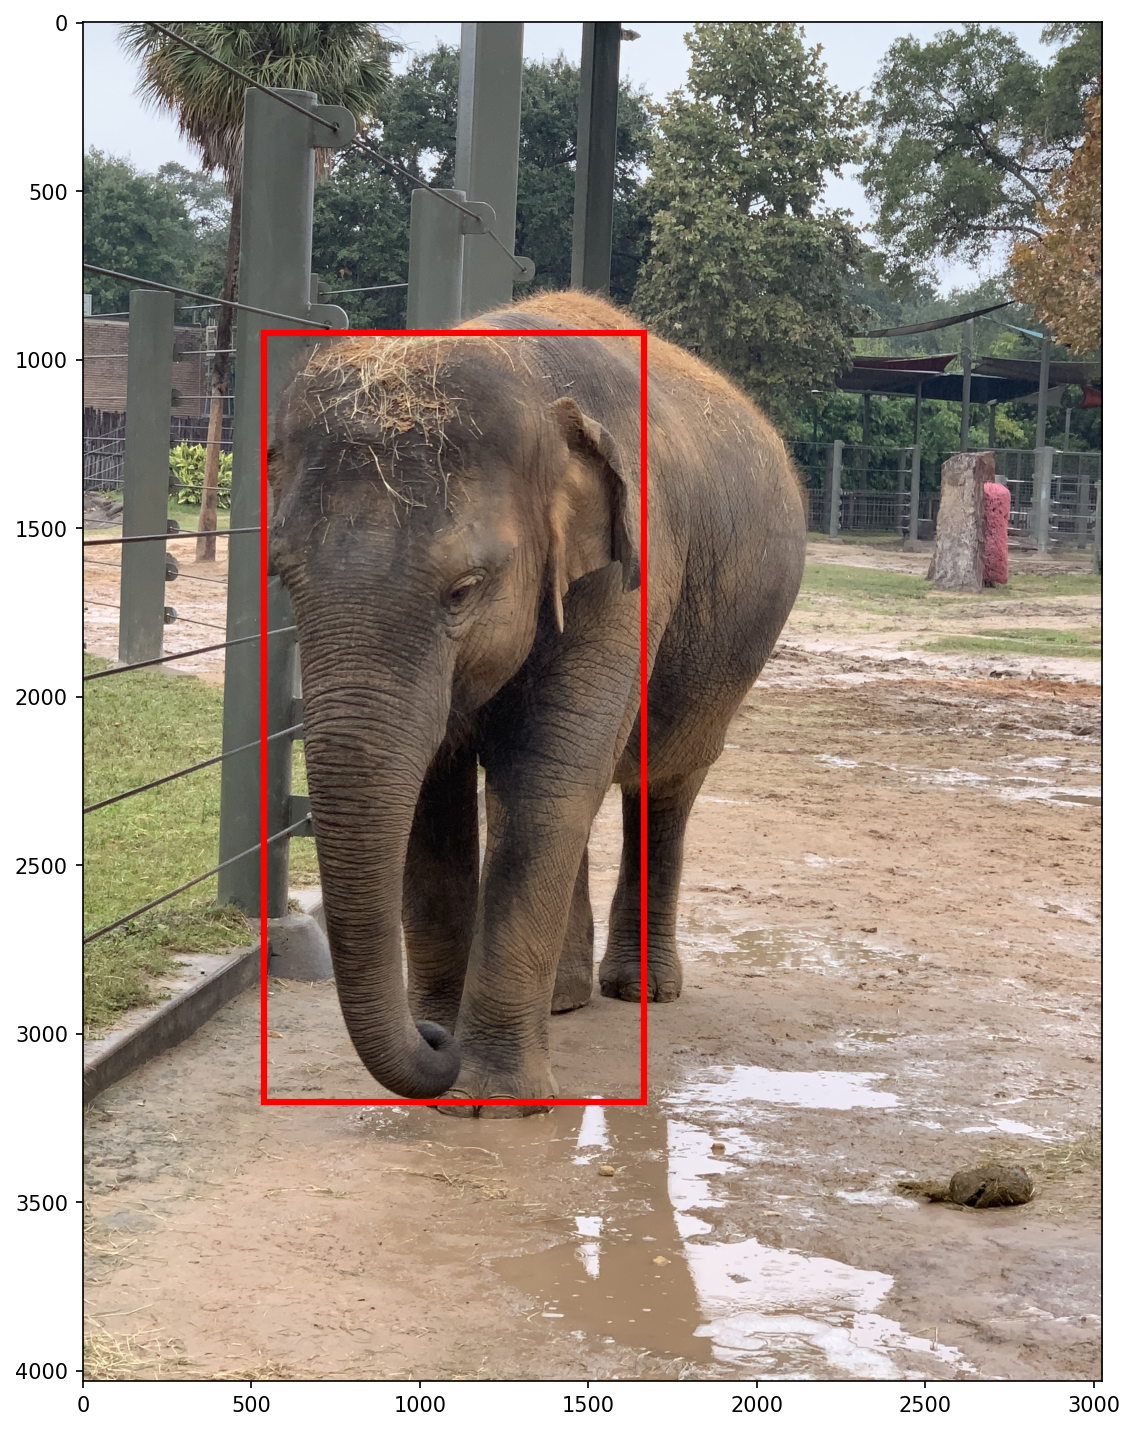

In [73]:
plt.figure(figsize=(12, 12), dpi=150)
plt.imshow(img)
ax = plt.gca()
ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                    fill=False, color='r', linewidth=3))

In [ ]:
shapes[1]['points']

In [58]:
from matplotlib.patches import Polygon

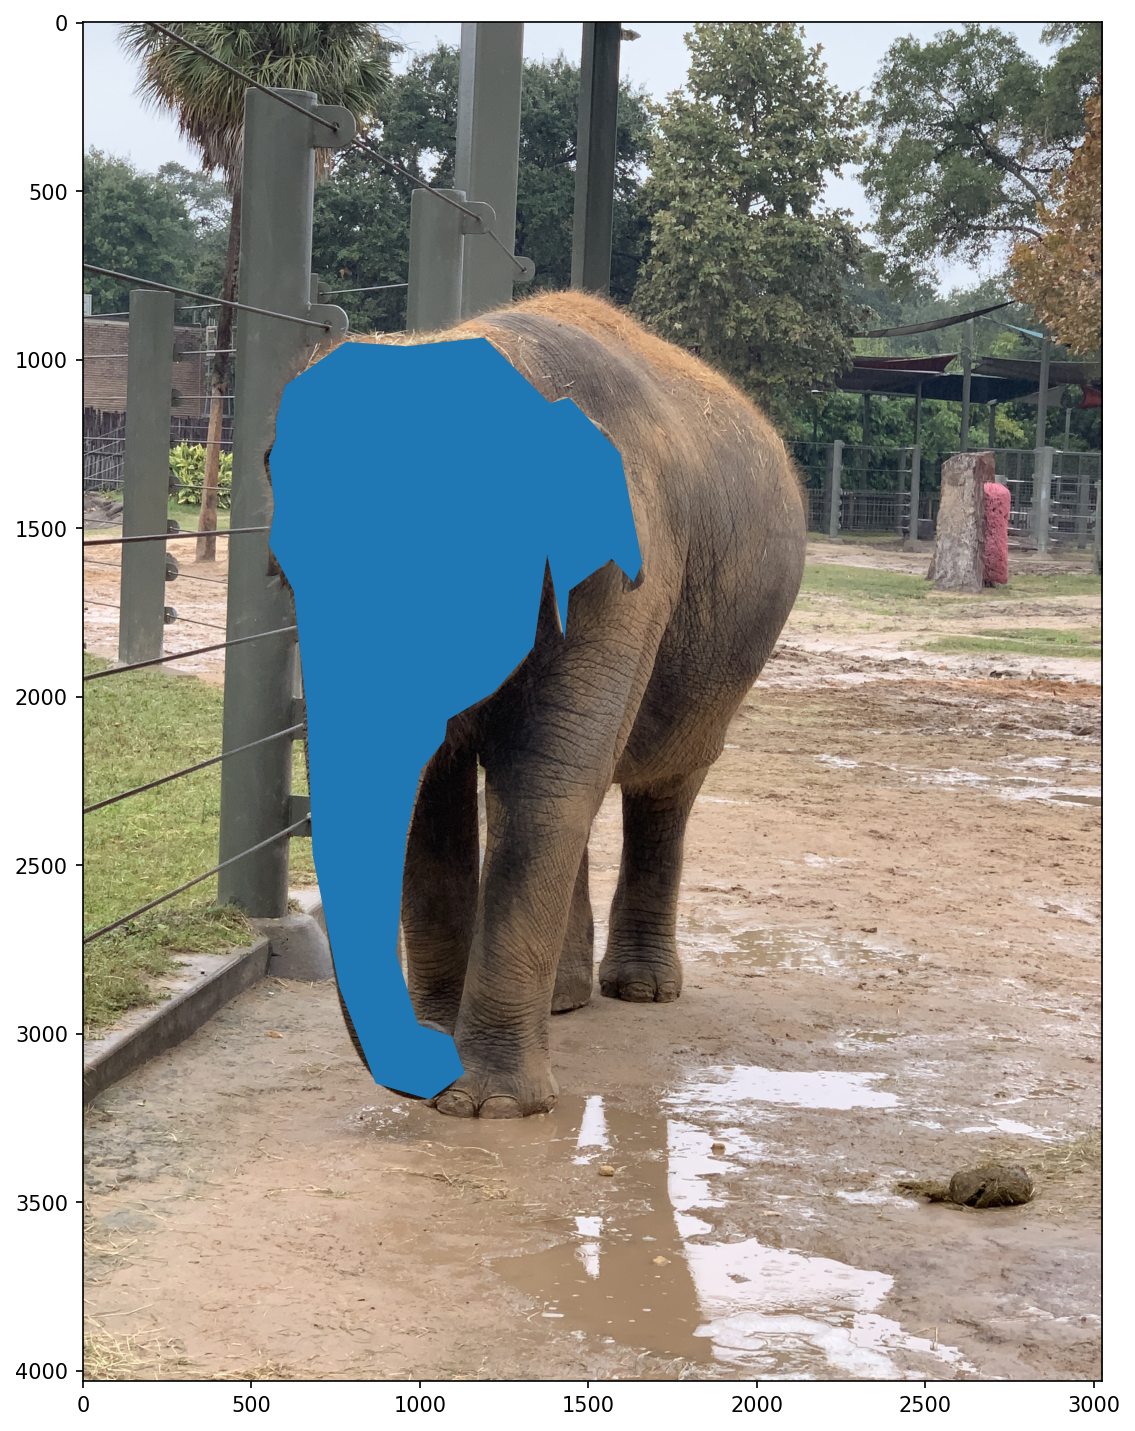

In [71]:
plt.figure(figsize=(12, 12), dpi=150)
plt.imshow(img)
ax = plt.gca()

ax.add_patch(Polygon(shapes[1]['points'], fill=True))

In [69]:
fname = '/Users/deepakduggirala/Documents/Elephants-dataset/1000/IMG_1617.json'

In [67]:
def get_bounding_box(fname):
    '''
    returns [[x_min, y_min], [x_max, y_max]]
    '''
    with open(fname) as f:
        data = f.read()
    json_data = json.loads(data)
    shapes = json_data.get('shapes', [])
    for shape in shapes:
        if shape.get('shape_type', '') == 'rectangle':
            return shape['points']

In [70]:
get_bounding_box(fname)

[[538.608695652174, 921.2173913043478],
 [1664.695652173913, 3203.8260869565215]]